# **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


## **Method 1- using polyfit()**


In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#store data
df = pd.read_csv("linear_regression.csv")

In [3]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

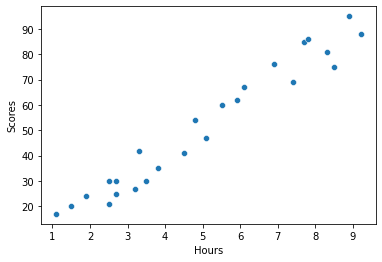

In [4]:
sns.scatterplot(x='Hours',y='Scores',data=df)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

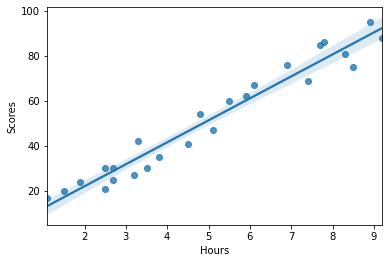

In [5]:
# Basically, we want to figure out how to create this line
sns.regplot(x='Hours',y='Scores',data=df)

In [6]:
X = df['Hours']
y = df['Scores']

In [7]:
# Returns highest order coef first!
np.polyfit(X,y,1)

array([9.77580339, 2.48367341])

In [8]:
# predicting for hours ranging from 0 to 10
predict_data = np.linspace(0,10,10)

In [9]:
predicted_score = 9.77580339 *predict_data + 2.48367341

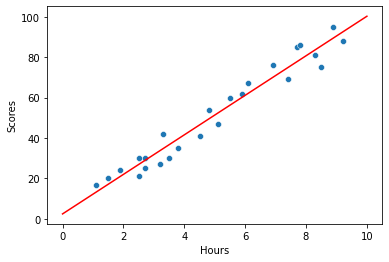

In [10]:
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.plot(predict_data,predicted_score,color='red')

In [11]:
#predicting score for 9.25 hours
predict= 9.25
predicted_score = 9.77580339 *predict + 2.48367341

In [12]:
predicted_score 

92.9098547675

## **Method 2- using sklearn**

In [13]:
#importing packages
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  

In [14]:
# splitting our data into train and test sets
X = df[['Hours']]
y = df.Scores 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=44) 

In [15]:
#training and fitting our model
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

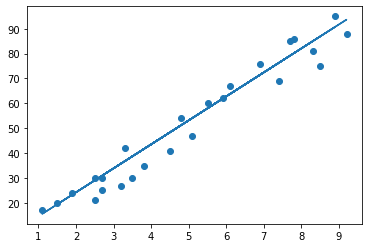

In [16]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
#predicting scores
y_pred = reg.predict(X_test) # Predicting the scores

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
19,69,76.305721
2,27,35.824691
11,62,61.848210
1,47,54.137538
4,30,38.716193
5,20,19.439512
12,41,48.354533
22,35,41.607695


In [19]:
#predicting score for 9.25 hours

predicted_score = reg.predict([[9.25]])
print(predicted_score)

[94.13665042]


In [20]:
#evaluating the model-- root mean square error
from sklearn import metrics  
print('root mean square Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)) )
print('mean absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))


root mean square Error: 6.673203606601071
mean absolute Error: 5.8323310706137494
